In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns
from datetime import date
from datetime import datetime

---
# Inicio

In [2]:
#Cargamos los datos y vemos los primeros registros
data = pd.read_csv('data/listings.csv')
data1 = pd.read_csv('data/listings_1.csv')
data2 = pd.read_csv('data/listings_2.csv')
data3 = pd.read_csv('data/listings_3.csv')
data = pd.concat([data, data1,data2,data3])
data = data.drop_duplicates()
data = data.reset_index()
data = data.drop(['index'], axis=1)
pd.set_option('display.max_columns', None)
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_group
0,11508,https://www.airbnb.com/rooms/11508,2.022092e+13,2022-09-22,city scrape,Amazing Luxurious Apt-Palermo Soho,<b>The space</b><br />LUXURIOUS NEW APT: 1 BDR...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,https://www.airbnb.com/users/show/42762,Candela,2009-10-01,"New York, NY",-,within a few hours,100%,75%,f,https://a0.muscache.com/im/users/42762/profile...,https://a0.muscache.com/im/users/42762/profile...,Palermo,1.0,2.0,"['email', 'phone']",t,t,"Buenos Aires, Capital Federal, Argentina",Palermo,NaN,-34.58184,-58.42415,Entire condo,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Shared fenced garden or backyard"", ""Elevator...","$9,823.00",3,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0.0,10.0,39.0,314,2022-09-22,30,3,0.0,2012-07-02,2022-07-17,4.77,4.93,4.86,4.90,4.97,4.93,4.93,NaN,f,1,1.0,0.0,0.0,0.24,NaN
1,118877,https://www.airbnb.com/rooms/118877,2.022092e+13,2022-09-22,city scrape,Entire Studio/apt in Buenos Aires,<b>The space</b><br />Inspired by the cultural...,NaN,https://a0.muscache.com/pictures/777724/21a535...,600320,https://www.airbnb.com/users/show/600320,Roxana,2011-05-18,"Buenos Aires, Argentina",Vivo en Palermo Hollywood hace mas de 20 años ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/37f1b...,https://a0.muscache.com/im/pictures/user/37f1b...,Palermo,2.0,11.0,"['email', 'phone']",t,t,NaN,Palermo,NaN,-34.57734,-58.43790,Entire loft,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Pack \u2019n play/Travel crib"", ""Refrigerato...","$5,687.00",2,730.0,2.0,2.0,730.0,730.0,2.0,730.0,NaN,t,0.0,0.0,0.0,174,2022-09-22,24,5,0.0,2011-10-17,2022-06-21,4.63,4.55,4.77,4.77,4.86,4.45,4.64,NaN,t,2,2.0,0.0,0.0,0.18,NaN
2,14222,https://www.airbnb.com/rooms/14222,2.022092e+13,2022-09-22,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,https://www.airbnb.com/users/show/87710233,María,2016-08-03,"Buenos Aires, Argentina","Soy Organizadora de Eventos, me gusta relacion...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/dc9d9...,https://a0.muscache.com/im/pictures/user/dc9d9...,NaN,4.0,6.0,"['email', 'phone']",t,t,"Palermo/Buenos Aires, Autonomous City of Bueno...",Palermo,NaN,-34.58617,-58.41036,Entire rental unit,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Host greets you"", ""Refrigerator"", ""Heating"",...","$3,728.00",7,1125.0,7.0,7.0,1125.0,1125.0,7.0,1125.0,NaN,t,6.0,19.0,49.0,324,2022-09-22,98,8,0.0,2012-07-10,2022-08-14,4.77,4.74,4.76,4.78,4.89,4.8

---
# Vemos las columnas

In [3]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67145 entries, 0 to 67144
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            67145 non-null  int64  
 1   listing_url                                   49827 non-null  object 
 2   scrape_id                                     49827 non-null  float64
 3   last_scraped                                  49827 non-null  object 
 4   source                                        17947 non-null  object 
 5   name                                          67129 non-null  object 
 6   description                                   48249 non-null  object 
 7   neighborhood_overview                         29398 non-null  object 
 8   picture_url                                   49827 non-null  object 
 9   host_id                                       67145 non-null 

---
Eliminamos las columnas que no aportan informacion

Estructura del dataset e información acerca de las columnas

https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596



In [4]:
data = data.drop(['id','source','availability_30','availability_60','availability_90','availability_365','listing_url','scrape_id','last_scraped','picture_url','host_id','host_url','host_name',
       'host_location','host_neighbourhood','neighborhood_overview','neighbourhood','neighbourhood_group','neighbourhood_group_cleansed',
      'host_thumbnail_url','host_about','host_response_time','host_has_profile_pic',
      'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_listings_count',
      'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
      'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated', 'calendar_last_scraped',
      'has_availability','host_response_time','host_total_listings_count','reviews_per_month',
      'number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','instant_bookable',
      'review_scores_location','review_scores_accuracy','review_scores_cleanliness','host_response_rate',
                  'review_scores_checkin','review_scores_communication','review_scores_value',
                  'license','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
      'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'
    ], axis=1)
   

In [5]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67145 entries, 0 to 67144
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    67129 non-null  object 
 1   description             48249 non-null  object 
 2   host_since              49823 non-null  object 
 3   host_is_superhost       49823 non-null  object 
 4   host_verifications      49827 non-null  object 
 5   host_identity_verified  49823 non-null  object 
 6   neighbourhood_cleansed  49827 non-null  object 
 7   latitude                67145 non-null  float64
 8   longitude               67145 non-null  float64
 9   property_type           49827 non-null  object 
 10  room_type               67145 non-null  object 
 11  accommodates            49827 non-null  float64
 12  bathrooms               0 non-null      float64
 13  bathrooms_text          49676 non-null  object 
 14  bedrooms                42544 non-null

In [6]:
data.head(5)

,name,description,host_since,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,Amazing Luxurious Apt-Palermo Soho,<b>The space</b><br />LUXURIOUS NEW APT: 1 BDR...,2009-10-01,f,"['email', 'phone']",t,Palermo,-34.58184,-58.42415,Entire condo,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Shared fenced garden or backyard"", ""Elevator...","$9,823.00",3,1125.0,30,4.77
1,Entire Studio/apt in Buenos Aires,<b>The space</b><br />Inspired by the cultural...,2011-05-18,t,"['email', 'phone']",t,Palermo,-34.57734,-58.43790,Entire loft,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Pack \u2019n play/Travel crib"", ""Refrigerato...","$5,687.00",2,730.0,24,4.63
2,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,2016-08-03,f,"['email', 'phone']",t,Palermo,-34.58617,-58.41036,Entire rental unit,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Host greets you"", ""Refrigerator"", ""Heating"",...","$3,728.00",7,1125.0,98,4.77
3,Great apt 1 Bedroom - 1.5 Bath /Recoleta,<b>The space</b><br />This great apartment is ...,2011-04-23,t,"['email', 'phone']",t,Recoleta,-34.58991,-58.39931,Entire rental unit,Entire home/apt,4.0,NaN,1.5 baths,1.0,1.0,"[""Elevator"", ""Refrigerator"", ""Heating"", ""Carbo...","$6,514.00",14,1125.0,10,4.67
4,Spotless entire apt. Ideal location,Apartment is situated on 4th floor. There are ...,2011-03-06,t,"['email', 'phone']",f,Almagro,-34.61982,-58.41660,Entire rental unit,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Elevator"", ""Refrigerator"", ""Heating"", ""Carbo...","$3,584.00",5,730.0,29,4.79


<AxesSubplot:title={'center':'Nulos por columna'}, ylabel='Columna'>

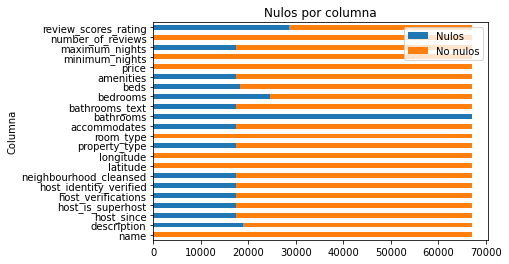

In [7]:
nulls = pd.DataFrame({'Columna':data.columns, 'Nulos':data.isnull().sum(),'No nulos':data.notnull().sum()})

# plot a Stacked Bar Chart using matplotlib
nulls.plot(
  x = 'Columna', 
  kind = 'barh', 
  stacked = True, 
  title = 'Nulos por columna', 
  mark_right = True)

Extraemos el tipo de baño y la cantidad

In [8]:
def extractBathRoomType(row):  
        if ("shared" in row["bathrooms_text"].lower()):
            return "shared"
        return "private"

def extractBathQuantity(row):  
        f = re.findall('\d*\.?\d+',row["bathrooms_text"])
        if (len(f)>0):
            return f[0]
        return "1"
    
data["bathrooms_text"] = data["bathrooms_text"].astype(str)
data["bathroomtype"] = data.apply(lambda x:extractBathRoomType(x),axis =1)   
data["bathrooms"] = data.apply(lambda x:extractBathQuantity(x),axis =1)   

data["bathrooms"] = data["bathrooms"].astype(float)
data["bathrooms"] = data["bathrooms"].apply(np.ceil)
data["bathrooms"] = data["bathrooms"].astype(int)
data = data.drop(['bathrooms_text'], axis=1)


In [9]:
data.bathrooms.value_counts()

1     53534
2     10674
3      2137
4       384
5       120
0        99
6        74
9        50
7        34
8        19
10        6
11        4
22        3
16        3
13        3
30        1
Name: bathrooms, dtype: int64

In [10]:
data.loc[data.review_scores_rating.isnull(),'review_scores_rating'] = 0

<AxesSubplot:title={'center':'Nulos por columna'}, ylabel='Columna'>

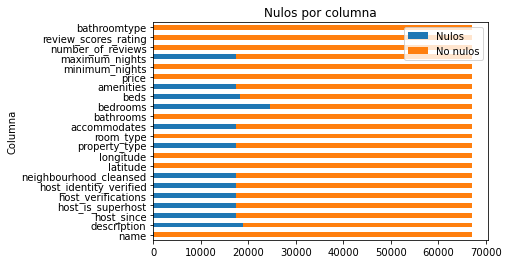

In [11]:
nulls = pd.DataFrame({'Columna':data.columns, 'Nulos':data.isnull().sum(),'No nulos':data.notnull().sum()})

# plot a Stacked Bar Chart using matplotlib
nulls.plot(
  x = 'Columna', 
  kind = 'barh', 
  stacked = True, 
  title = 'Nulos por columna', 
  mark_right = True)

In [12]:
#Relleno con patron regex según la palabra ambiente

numbers_es = ["mono","un","dos","tres","cuatro","cinco","seis"]
numbers_en = ["single","one","two","three","four","five","six"]


patron = '((?P<numero>\d|mono|un|dos|tres|cuatro|cinco|seis|single|one|two|three|four|five|six|1|2|3|4|5|6)\s*((?P<ambiente>amb)|(?P<bedroom>hab|bedroom|bdr)))'
patron_regex = re.compile(patron,flags = re.IGNORECASE)

In [13]:
#Rooms nulos antes
print('Nulos antes: ',data.bedrooms.isnull().sum())

def extractBedRoom(row):
    try:
        resultado=None
        ambientes=0
        if (row['description'] and isinstance(row['description'],str)):
            resultado = patron_regex.search(row['description'])
        if ((resultado is None) and row['name'] and isinstance(row['name'],str)):
            resultado = patron_regex.search(row['name'])
        if (resultado is not None):
            qty = 1
            if (resultado.group("numero") in numbers_es):
                qty = numbers_es.index(resultado.group("numero"))
                if (qty == 0):
                    qty = 1
            elif(resultado.group("numero") in numbers_en):
                qty = numbers_en.index(resultado.group("numero"))
                if (qty == 0):
                    qty = 1
            elif(isnumeric(resultado.group("numero"))):
                qty = int(resultado.group("numero"))
            if (resultado.group("ambiente")):
                if (qty > 1):
                    qty = qty - 1
            return qty    
    
    except:
        return np.nan       
            
        
data.loc[data.bedrooms.isnull(),'bedrooms'] = data.loc[data.bedrooms.isnull()].apply(extractBedRoom,axis=1)

#Rooms nulos despues de limpiar
print('Nulos después: ',data.bedrooms.isnull().sum())

Nulos antes:  24601
Nulos después:  23284


In [14]:
data.loc[data.bedrooms.isnull(),'bedrooms'] = 1
data.loc[data.beds.isnull(),'beds'] = 1

### Convertimos las columnas con true y false a números

In [15]:
data.replace({'f': 0, 't': 1}, inplace=True)

### Columna Precio

Quitamos el signo monetario, y lo convertimos a int

In [16]:
data['price']

0        $9,823.00
1        $5,687.00
2        $3,728.00
3        $6,514.00
4        $3,584.00
           ...    
67140         6498
67141         1554
67142         9600
67143         3927
67144         1200
Name: price, Length: 67145, dtype: object

In [17]:
data['price'] = data['price'].astype('string').str.replace(',', '').str.replace('\$', '').astype('float64').astype('int32')
data['price']

0        9823
1        5687
2        3728
3        6514
4        3584
         ... 
67140    6498
67141    1554
67142    9600
67143    3927
67144    1200
Name: price, Length: 67145, dtype: int32

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

data.price.describe()

count      67145.00000
mean        8927.28382
std       101725.68255
min            0.00000
25%         3000.00000
50%         4550.00000
75%         7238.00000
max     14330511.00000
Name: price, dtype: float64

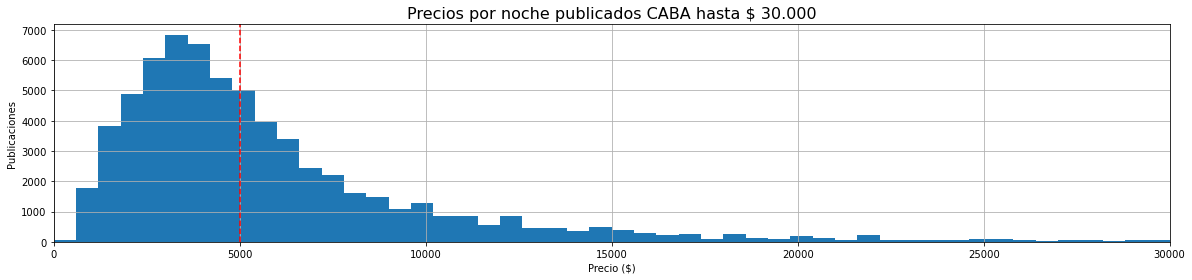

In [19]:
plt.figure(figsize=(20,4))
data.price.hist(bins=50, range=(0,30000))
plt.margins(x=0)
plt.axvline(5000, color='red', linestyle='--')
plt.title("Precios por noche publicados CABA hasta $ 30.000", fontsize=16)
plt.xlabel("Precio ($)")
plt.ylabel("Publicaciones")
plt.show()

### Tipo de propiedad

Vamos a normalizar los tipos de propiedades en Apartment, House, Hotel, y otros

In [20]:
data.property_type.value_counts()

Entire rental unit             31169
Entire condo                    4300
Private room in rental unit     3139
Entire loft                     1813
Entire serviced apartment       1604
                               ...  
Bus                                1
Room in heritage hotel             1
Shared room in chalet              1
Shared room in ryokan              1
Ranch                              1
Name: property_type, Length: 85, dtype: int64

In [21]:
data.room_type.value_counts()

Entire home/apt    56355
Private room        9287
Shared room          960
Hotel room           543
Name: room_type, dtype: int64

In [22]:
data.loc[data["property_type"].str.contains("Entire cottage|Ranch|Shared room in guest suite|house|casa|villa|home|townhouse|chalet|Entire place|Entire cabin",case=False,na=False),"property_type"] = "House"
data.loc[data["property_type"].str.contains("Cave|Shared room in ryokan|loft|apartment|dept|condo|floor|rental unit|Entire in-law|Entire guest suite|Private room in guest suite|Private room",case=False,na=False),"property_type"] = "Apartment"
data.loc[data["property_type"].str.contains("Pension|hostel|hotel|bed and breakfast|resort",case=False,na=False),"property_type"] = "Hotel"
data.loc[~data.property_type.isin(['House', 'Apartment','Hotel']), 'property_type'] = 'Other'


In [23]:
pd.set_option('display.max_rows', 500)
data.property_type.value_counts()

Apartment    44787
Other        17353
House         4255
Hotel          750
Name: property_type, dtype: int64

In [24]:
data = data.loc[data.property_type != "Hotel"]
data = data.loc[data.property_type != "Other"]
data = data.loc[data.room_type != "Hotel room"]
data.property_type.value_counts()

Apartment    44722
House         4255
Name: property_type, dtype: int64

In [25]:
data.describe()

,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
count,48973.00000,48973.00000,48977.00000,48977.00000,48977.00000,48977.00000,48977.00000,48977.00000,48977.00000,48977.00000,48977.00000,48977.00000,48977.00000
mean,0.26298,0.78674,-34.59081,-58.41754,2.85248,1.35437,1.31805,1.91755,9349.18251,7.94583,614.81885,20.64422,3.66135
std,0.44026,0.40961,0.01900,0.03034,1.52044,0.73619,0.89155,1.52193,115608.79798,29.08861,947.97961,37.55980,2.03661
min,0.00000,0.00000,-34.69370,-58.54437,1.00000,0.00000,1.00000,1.00000,260.00000,1.00000,1.00000,0.00000,0.00000
25%,0.00000,1.00000,-34.60150,-58.43681,2.00000,1.00000,1.00000,1.00000,3327.00000,2.00000,90.00000,1.00000,4.00000
50%,0.00000,1.00000,-34.59013,-58.41904,2.00000,1.00000,1.00000,1.00000,4967.00000,3.00000,365.00000,6.00000,4.78000
75%,1.00000,1.00000,-34.58062,-58.39318,4.00000,2.00000,1.00000,2.00000,7658.00000,5.00000,1125.00000,23.00000,4.98000
max,1.00000,1.00000,-34.51399,-58.35553,16.00000,16.00000,35.00000,70.00000,14330511.00000,1000.00000,99999.00000,577.00000,5.00000


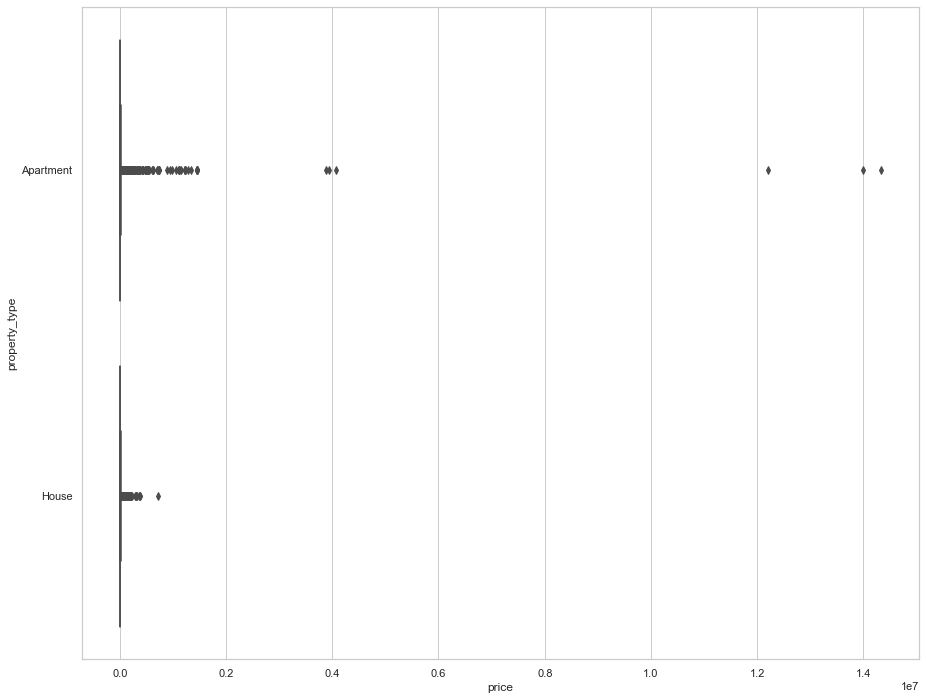

In [26]:
#Analizamos outliers mediante boxplot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,12))
sns.boxplot(data=data, x="price", y="property_type", orient="h")
plt.show()

In [27]:
# quitar outliers de precios
data = data.loc[ data['price'] <  200000 ]
data = data.loc[ data['price'] >  1000 ]
data = data.loc[ data['price']< (data['price'].mean() + 3*data['price'].std())]

# data = data[np.logical_not(self._findOutliers(data, 'price',limit=3))]
# quitar outliers de baños
data = data[data.bathrooms < 6]        
# quitamos outliers de habitaciones
data = data[data.bedrooms < 10]


In [28]:
data.describe()

,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
count,47879.00000,47879.00000,47883.00000,47883.00000,47883.00000,47883.00000,47883.00000,47883.00000,47883.00000,47883.00000,47883.00000,47883.00000,47883.00000
mean,0.26446,0.78817,-34.59072,-58.41761,2.79057,1.31514,1.27223,1.85538,6255.74576,7.71006,614.59815,20.86369,3.68558
std,0.44105,0.40861,0.01895,0.03030,1.31328,0.58511,0.61222,1.19935,4645.46952,26.76673,955.86242,37.74461,2.02196
min,0.00000,0.00000,-34.69370,-58.54437,1.00000,0.00000,1.00000,1.00000,1001.00000,1.00000,1.00000,0.00000,0.00000
25%,0.00000,1.00000,-34.60125,-58.43687,2.00000,1.00000,1.00000,1.00000,3327.00000,2.00000,90.00000,1.00000,4.00000
50%,0.00000,1.00000,-34.59008,-58.41908,2.00000,1.00000,1.00000,1.00000,4929.00000,3.00000,365.00000,6.00000,4.78000
75%,1.00000,1.00000,-34.58060,-58.39338,4.00000,2.00000,1.00000,2.00000,7394.00000,5.00000,1125.00000,24.00000,4.98000
max,1.00000,1.00000,-34.51399,-58.35553,16.00000,5.00000,9.00000,16.00000,33519.00000,1000.00000,99999.00000,577.00000,5.00000


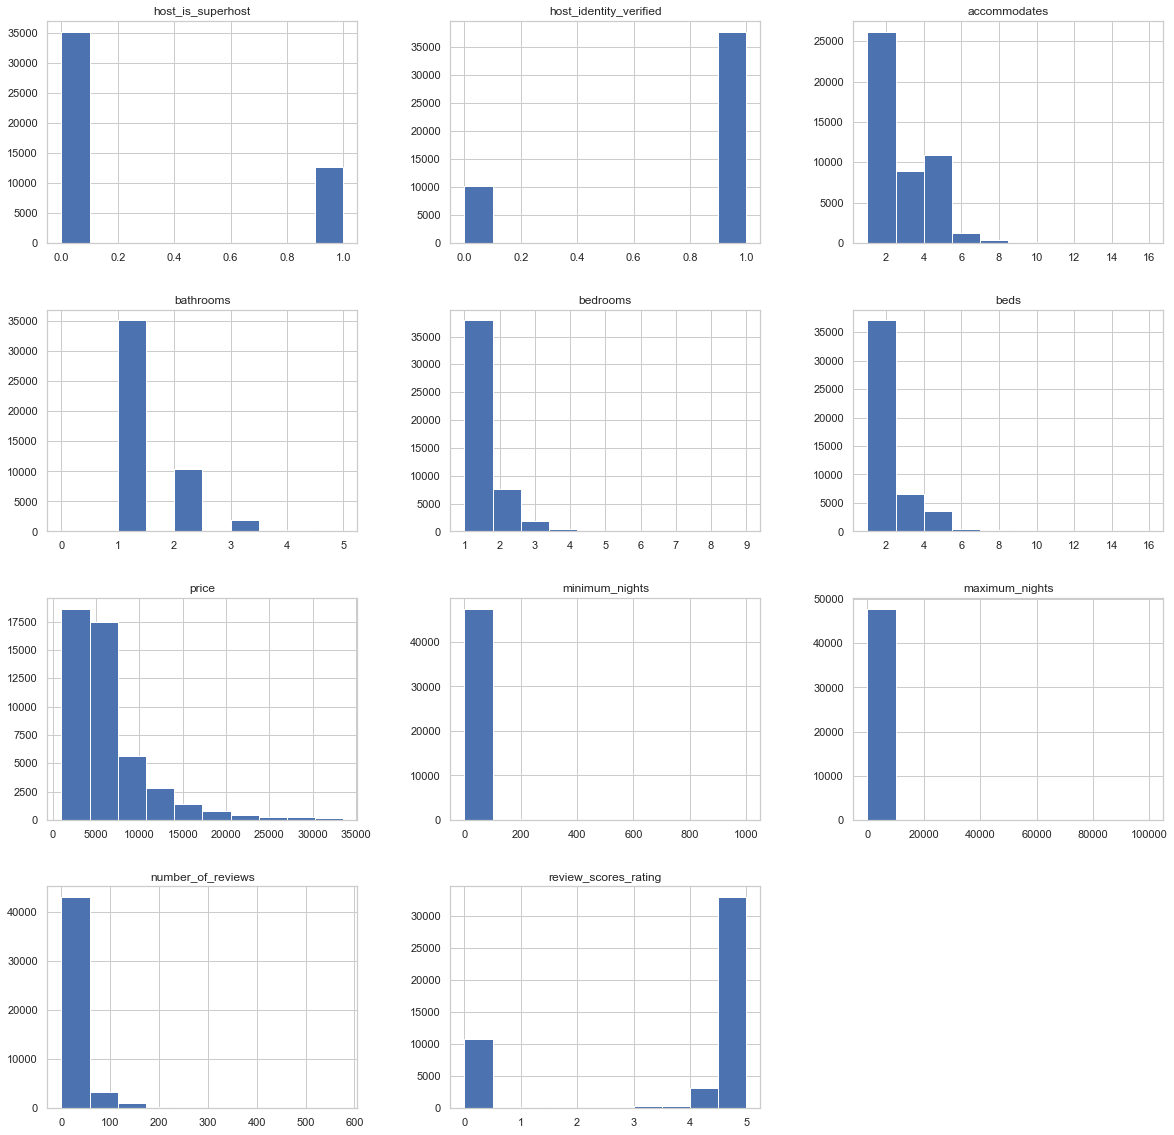

In [29]:
data.drop(['latitude','longitude'], axis=1).hist(figsize=(20,20));

# visualizamos la matriz de correlación en Seaborn usando a heatmap


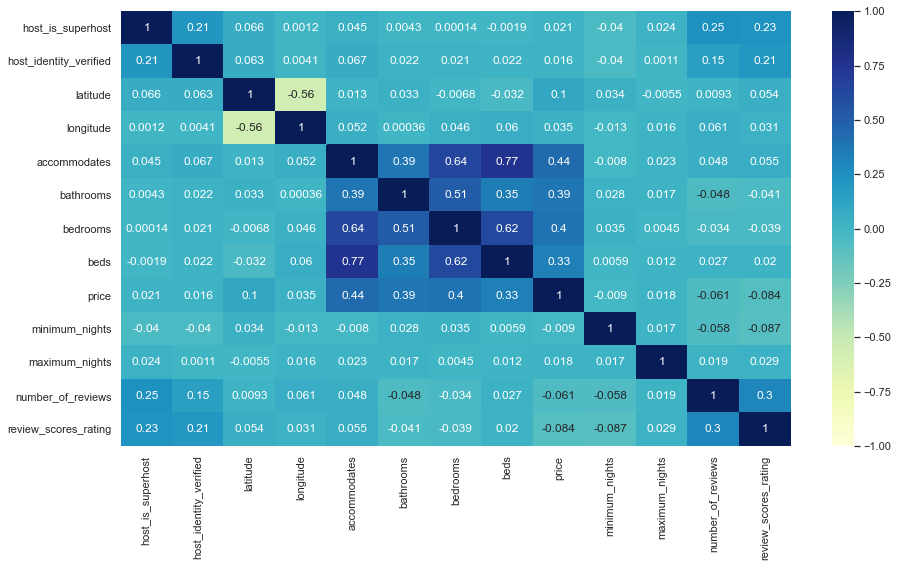

In [30]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

Tomamos los amenities

In [31]:
amenities = data.amenities.str.replace("[{}]", "").str.replace('"', "").str.replace('\\\\u2013', '-').str.replace('\\\\u2019','´').str.replace('\\\\u00f3','ó').str.replace('\\\\u00e9','é').str.replace('\\\\u00ed','í').str.replace('\\\\u00e1','á').str.replace('\\\\u00b4','').str.replace('\\\\u00f1','ñ').str.replace('\\\\u00a0','').str.replace('{', '').str.replace('}', ',').str.replace('[', '').str.replace(']', ',').str.replace('"', '')
amenities.head()    

0    Shared fenced garden or backyard, Elevator, Dr...
1    Pack ´n play/Travel crib, Refrigerator, Heatin...
2    Host greets you, Refrigerator, Heating, Essent...
3    Elevator, Refrigerator, Heating, Carbon monoxi...
4    Elevator, Refrigerator, Heating, Carbon monoxi...
Name: amenities, dtype: object

In [32]:
dict = [
        {"feature":"air_conditioning","values":["AC - split type ductless system","Air conditioning","aire acondicionado"]}
       ,{"feature":"pool","values":["Shared pool","pool","pileta","piscina"]}
       ,{"feature":"parking","values":["Paid parking on premises","Paid parking lot off premises","Paid parking off premises","private parking","estacionamiento","cochera"]}
       ,{"feature":"tv","values":["tv","HDTV","Smart TV"]}
       ,{"feature":"internet","values":["Wifi","High speed cable","internet","Ethernet connection"]}
       ,{"feature":"gym","values":["Exercise equipment","Gym","gimnasio"]}
       ,{"feature":"pet_friendly","values":["pet","pets","mascotas","mascota","Cat(s)","Dog(s)","perros","gatos"]}
       ,{"feature":"grill","values":["BBQ grill","parrilla","grill","BBQ","asador"]} 
       ,{"feature":"elevator","values":["Elevator","Ascensor","elevador"]}  
       ]

In [33]:
for feat in dict:
    for x in feat["values"]:
        data.loc[data.amenities.str.contains(x,case=False,na=False),feat["feature"]] = 1 

C:\Users\nacho\miniconda3\envs\dsdh22\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [34]:
data = data.fillna(0)

In [35]:
data.neighbourhood_cleansed.value_counts()

Palermo              16315
Recoleta              7386
San Nicolas           2893
Retiro                2397
Belgrano              2308
Monserrat             1700
Almagro               1679
Balvanera             1650
Villa Crespo          1434
San Telmo             1310
Nuñez                 1231
Colegiales            1013
Caballito              909
Chacarita              690
Puerto Madero          633
Constitucion           562
Villa Urquiza          535
Saavedra               433
Barracas               342
San Cristobal          244
Flores                 205
Boca                   194
Boedo                  193
Villa Devoto           163
Coghlan                148
Villa Ortuzar          140
Parque Patricios       114
Villa Pueyrredon       110
Parque Chacabuco       108
Villa Del Parque       105
Villa Santa Rita        76
Paternal                76
Parque Chas             69
Floresta                59
Agronomia               47
Villa Luro              43
Velez Sarsfield         40
V

In [36]:
data.loc[data.neighbourhood_cleansed == "Dique 1","neighbourhood_cleansed"] = "Puerto Madero"
data.loc[data.neighbourhood_cleansed == "Dique 4","neighbourhood_cleansed"] = "Puerto Madero"
data.loc[data.neighbourhood_cleansed == "Dique 3","neighbourhood_cleansed"] = "Puerto Madero"
data.loc[data.neighbourhood_cleansed == "Dique 2","neighbourhood_cleansed"] = "Puerto Madero"
data.neighbourhood_cleansed.value_counts()

Palermo              16315
Recoleta              7386
San Nicolas           2893
Retiro                2397
Belgrano              2308
Monserrat             1700
Almagro               1679
Balvanera             1650
Villa Crespo          1434
San Telmo             1310
Nuñez                 1231
Colegiales            1013
Caballito              909
Puerto Madero          704
Chacarita              690
Constitucion           562
Villa Urquiza          535
Saavedra               433
Barracas               342
San Cristobal          244
Flores                 205
Boca                   194
Boedo                  193
Villa Devoto           163
Coghlan                148
Villa Ortuzar          140
Parque Patricios       114
Villa Pueyrredon       110
Parque Chacabuco       108
Villa Del Parque       105
Villa Santa Rita        76
Paternal                76
Parque Chas             69
Floresta                59
Agronomia               47
Villa Luro              43
Villa Gral. Mitre       40
V

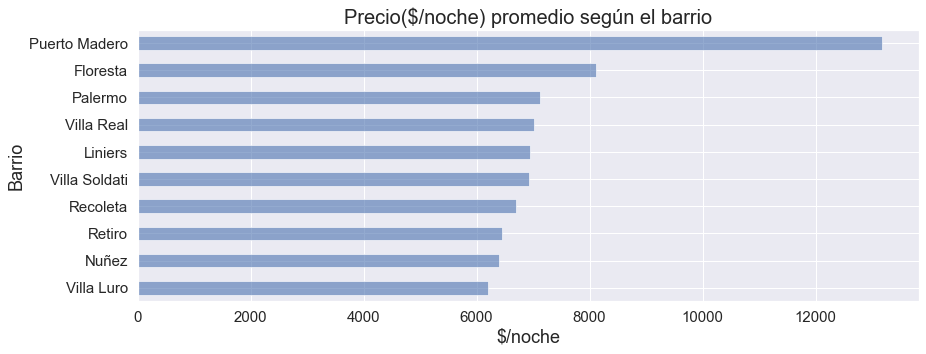

In [37]:
dfzone = data.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False)[0:10]
g = dfzone.sort_values().plot.barh(figsize=(14,5),color='b',fontsize=15, alpha=0.6);
g.set_title("Precio($/noche) promedio según el barrio", fontsize=20)
g.set_ylabel("Barrio", fontsize=18)
g.set_xlabel("$/noche", fontsize=18)
plt.show()

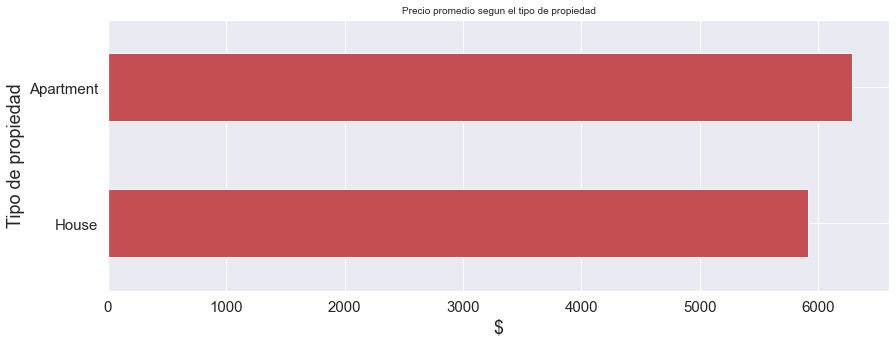

In [38]:
df_tipo_prop = data.groupby('property_type').mean()['price'].sort_values(ascending=False)[0:5]
graf = df_tipo_prop.sort_values().plot.barh(figsize=(14,5),fontsize=15, color='r')
graf.set_title("Precio promedio segun el tipo de propiedad", fontsize=10)
graf.set_ylabel("Tipo de propiedad", fontsize=18)
graf.set_xlabel("$", fontsize=18)
plt.show()

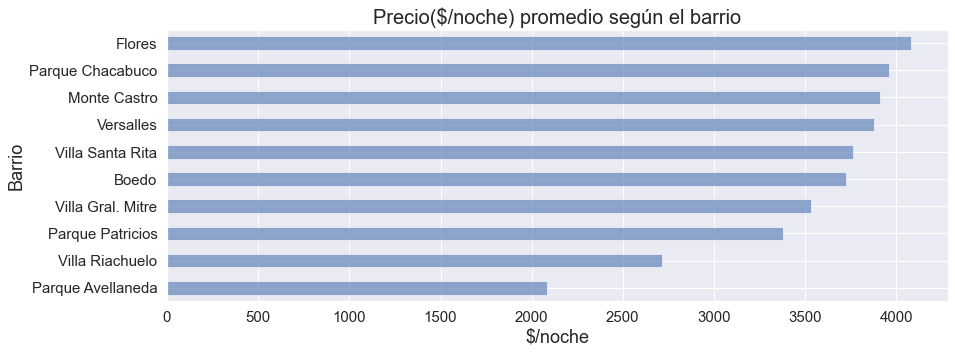

In [39]:
dfzone = data.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=True)[0:10]
g = dfzone.sort_values().plot.barh(figsize=(14,5),color='b',fontsize=15, alpha=0.6);
g.set_title("Precio($/noche) promedio según el barrio", fontsize=20)
g.set_ylabel("Barrio", fontsize=18)
g.set_xlabel("$/noche", fontsize=18)
plt.show()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47883 entries, 0 to 49826
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    47883 non-null  object 
 1   description             47883 non-null  object 
 2   host_since              47883 non-null  object 
 3   host_is_superhost       47883 non-null  float64
 4   host_verifications      47883 non-null  object 
 5   host_identity_verified  47883 non-null  float64
 6   neighbourhood_cleansed  47883 non-null  object 
 7   latitude                47883 non-null  float64
 8   longitude               47883 non-null  float64
 9   property_type           47883 non-null  object 
 10  room_type               47883 non-null  object 
 11  accommodates            47883 non-null  float64
 12  bathrooms               47883 non-null  int32  
 13  bedrooms                47883 non-null  float64
 14  beds                    47883 non-null

In [41]:
data = data.drop(['name','description','amenities','host_since','host_verifications','latitude','longitude'], axis=1)

In [42]:
data['bathrooms'] = data['bathrooms'].astype(int)
data['bedrooms'] = data['bedrooms'].astype(int)
data['air_conditioning'] = data['air_conditioning'].astype(int)
data['pool'] = data['pool'].astype(int)
data['parking'] = data['parking'].astype(int)
data['tv'] = data['tv'].astype(int)
data['parking'] = data['parking'].astype(int)
data['internet'] = data['internet'].astype(int)
data['gym'] = data['gym'].astype(int)
data['pet_friendly'] = data['pet_friendly'].astype(int)
data['pet_friendly'] = data['pet_friendly'].astype(int)
data['grill'] = data['grill'].astype(int)
data['elevator'] = data['elevator'].astype(int)
data['host_is_superhost'] = data['host_is_superhost'].astype(int)
data['host_identity_verified'] = data['host_identity_verified'].astype(int)
data['accommodates'] = data['accommodates'].astype(int)
data['beds'] = data['beds'].astype(int)
data['maximum_nights'] = data['maximum_nights'].astype(int)
data['review_scores_rating'] = data['review_scores_rating'].astype("float32")

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47883 entries, 0 to 49826
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       47883 non-null  int32  
 1   host_identity_verified  47883 non-null  int32  
 2   neighbourhood_cleansed  47883 non-null  object 
 3   property_type           47883 non-null  object 
 4   room_type               47883 non-null  object 
 5   accommodates            47883 non-null  int32  
 6   bathrooms               47883 non-null  int32  
 7   bedrooms                47883 non-null  int32  
 8   beds                    47883 non-null  int32  
 9   price                   47883 non-null  int32  
 10  minimum_nights          47883 non-null  int64  
 11  maximum_nights          47883 non-null  int32  
 12  number_of_reviews       47883 non-null  int64  
 13  review_scores_rating    47883 non-null  float32
 14  bathroomtype            47883 non-null

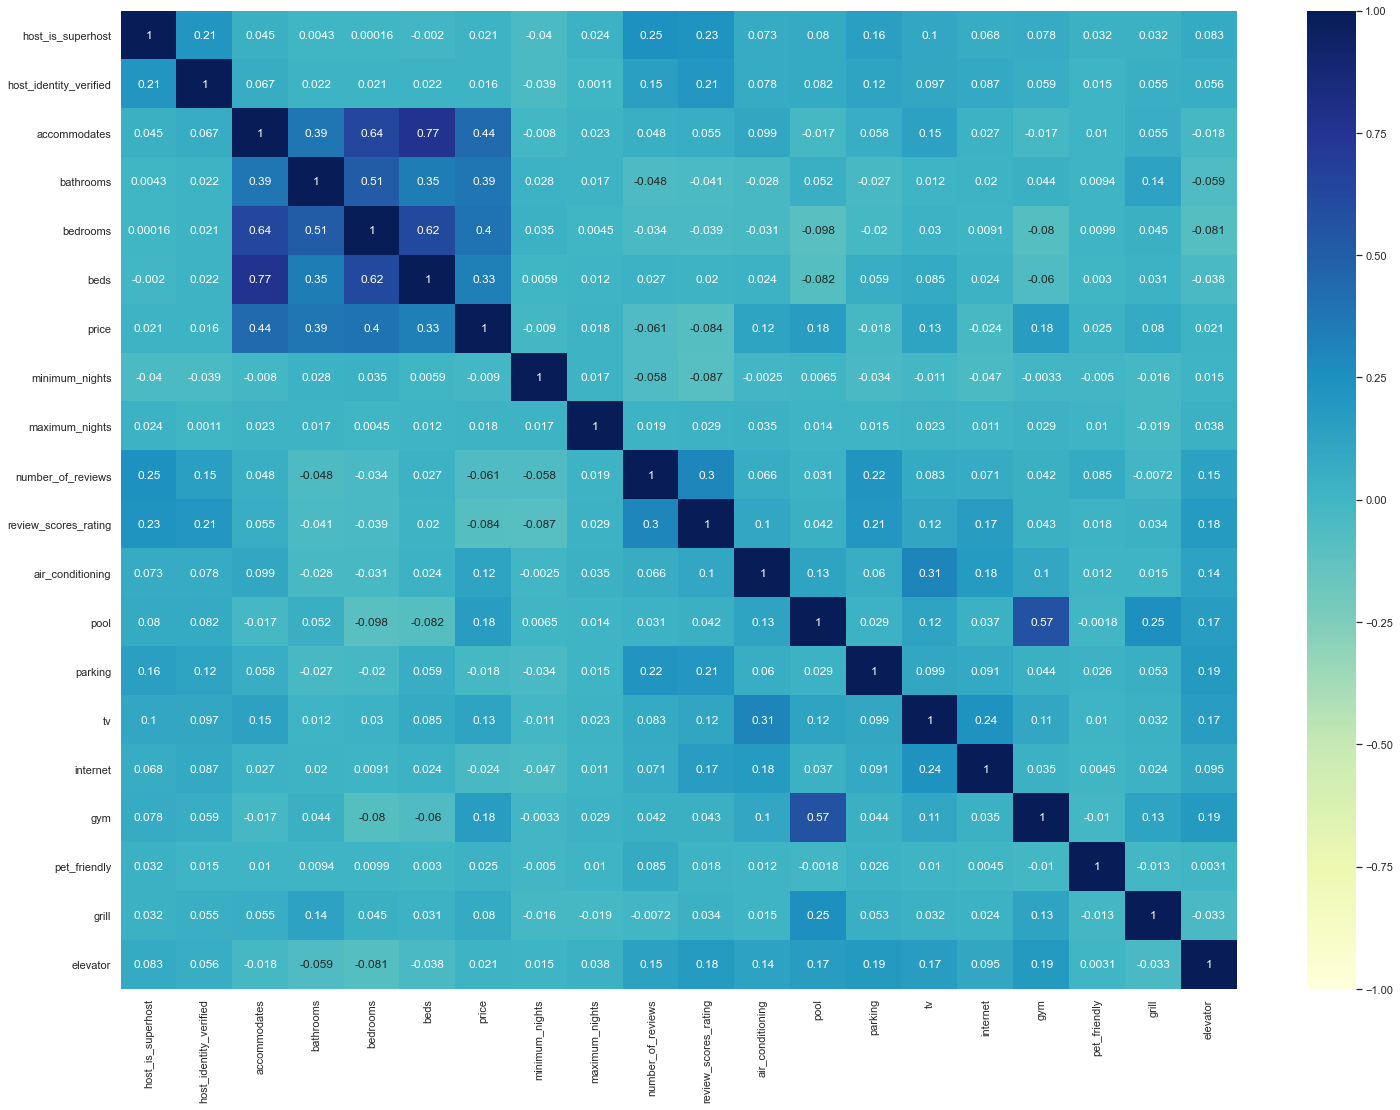

In [43]:
sns.set(rc = {'figure.figsize':(25,18)})
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

In [44]:
data = pd.get_dummies(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47883 entries, 0 to 49826
Data columns (total 75 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   host_is_superhost                         47883 non-null  int32  
 1   host_identity_verified                    47883 non-null  int32  
 2   accommodates                              47883 non-null  int32  
 3   bathrooms                                 47883 non-null  int32  
 4   bedrooms                                  47883 non-null  int32  
 5   beds                                      47883 non-null  int32  
 6   price                                     47883 non-null  int32  
 7   minimum_nights                            47883 non-null  int64  
 8   maximum_nights                            47883 non-null  int32  
 9   number_of_reviews                         47883 non-null  int64  
 10  review_scores_rating              

In [45]:
data.columns = data.columns.str.replace('neighbourhood_cleansed_', '')
data.columns = data.columns.str.replace('property_type_Apartment', 'Apartment')
data.columns = data.columns.str.replace('property_type_House', 'House')
data.columns = data.columns.str.replace('room_type_Private room', 'Private room')
data.columns = data.columns.str.replace('room_type_Shared room', 'Shared room')
data.columns = data.columns.str.replace('room_type_Entire home/apt', 'Entire home/apt')

In [46]:
data.to_csv("dataclean.csv")

In [47]:
data.to_pickle("dataclean.pkl", protocol=2)